# Linear Regression:
                Linear regression is one of the easiest algorithms in Machine learning. Linear regression is a way to express relationship between an independent variable and a dependent variable. We have to find a linear model that is as accurate as possible which will predict the dependent variable value as a function of independent variable value.

# Hypothesis:
    Our hypothesis in the linear regression case will be a function that will mape the independent values to the dependent values.
\begin{align}
\dot h_x & = \theta_0 + \theta_1X
\end{align}

    This is for univariable we can extend it to multiple variable
In this the X is the independent variable which is also called feature and output $ h_x $ is the dependent variable which is also called the prediction.

In [96]:
#first i imported my dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
def hypothesis(x, theta):
    return np.dot(x, np.transpose(theta))

Now that we have implemented the hypothesis function using python lets test it using arbitraru data.

In [106]:
theta = [0, 0.5]
df = pd.DataFrame({'a': [1, 1, 1, 1 ,1, 1, 1],'x':[1, 2, 3, 4, 3, 2, 4], 'y':[1, 2, 1, 4, 4, 3, 5]})
hy_result = hypothesis(df[['a', 'x']], theta)
hy_result

array([0.5, 1. , 1.5, 2. , 1.5, 1. , 2. ])

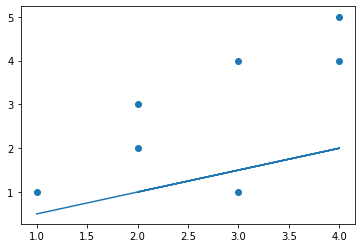

In [107]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], hy_result)

# Cost: 
As we chose just random values for the $ \theta_0 and \theta_1 $ it does fit well through the data. To make the model work fine we have to chose those values for $ \theta_0 and \theta_1 $ that will reduce this cost function.
$$ \ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) $$
Now we have to find $ \theta_0 and \theta_1 $ which give small cost.

### Hypothesis:

\begin{align}
\dot h_x & = \theta_0 + \theta_1X
\end{align}
### Parameter:

$$ \theta_0 and \theta_1 $$
### Cost Function:

$$ \ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)}) $$

### Goal: 

$$ Minimize  \ J(\theta_0, \theta_1)  using  \theta_0 and \theta_1 $$